In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All libray imported')

All libray imported


In [2]:
# load the dataset
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
# missing value
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

There is no null values in the dataset

In [7]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

We can see that the dataset is imbalanced

## Exploratory data analysis of different factors of the dataset.

In [8]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

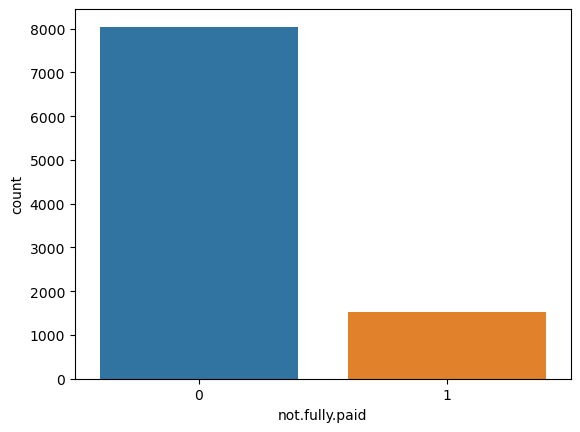

In [9]:
sns.countplot(x=df['not.fully.paid'])
plt.show()

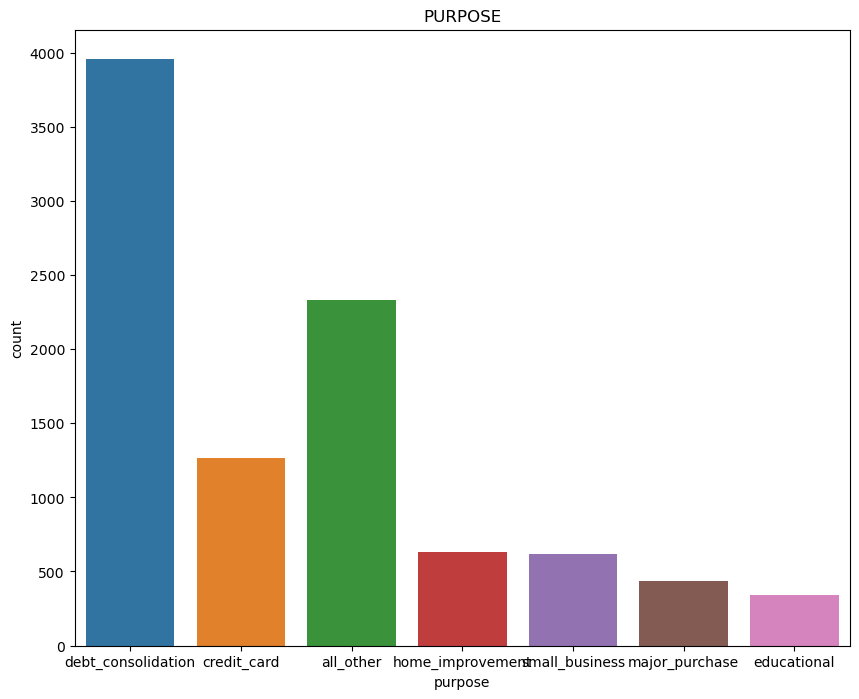

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['purpose'])
plt.title('PURPOSE')
plt.show()

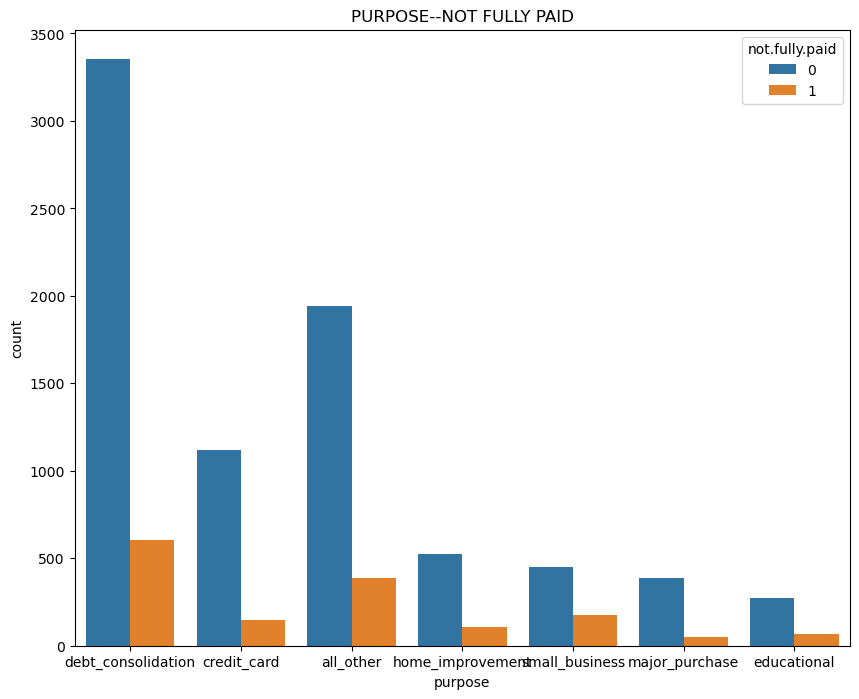

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)
plt.title('PURPOSE--NOT FULLY PAID')
plt.show()

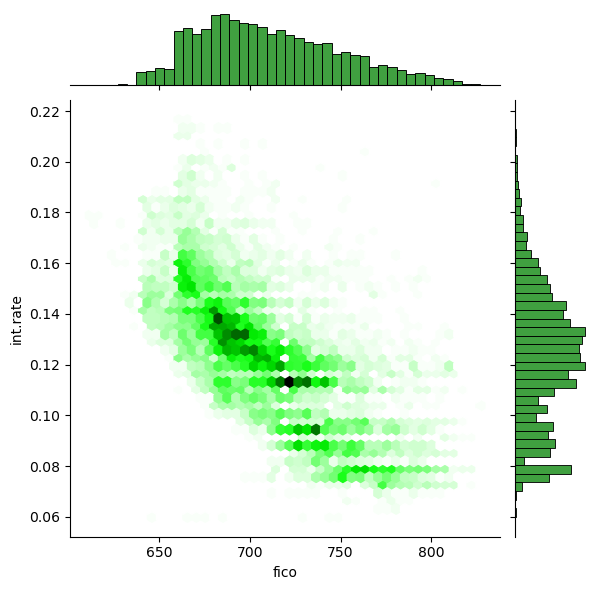

In [13]:
sns.jointplot(x='fico',y='int.rate',data=df,kind='hex',color='g')
plt.show()

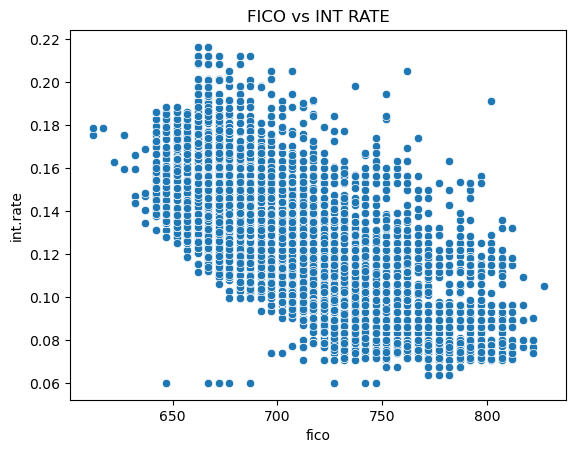

In [14]:
sns.scatterplot(x='fico',y='int.rate',data=df)
plt.title('FICO vs INT RATE')
plt.show()

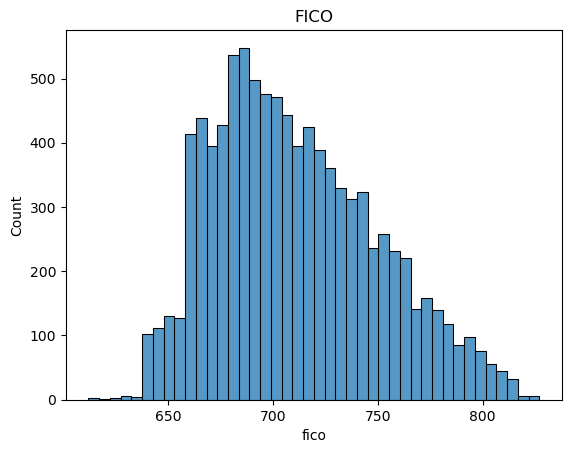

In [15]:
sns.histplot(df['fico'])
plt.title('FICO')
plt.show()

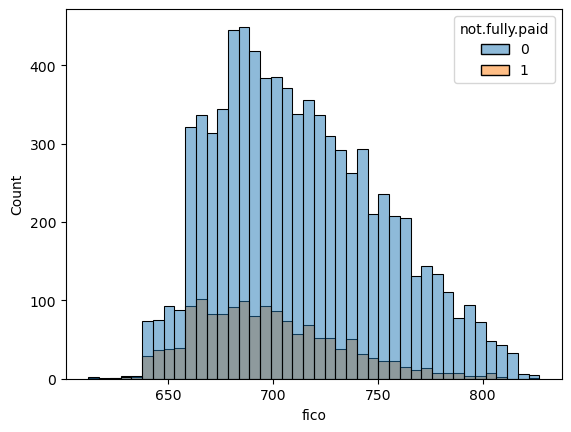

In [16]:
sns.histplot(x='fico',hue='not.fully.paid',data=df)
plt.show()

Feature Transformation

Transform categorical values into numerical values (discrete)

In [17]:
# handle imbalanced dataset
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [18]:
not_fully_paid_0=df[df['not.fully.paid']==0]
not_fully_paid_1=df[df['not.fully.paid']==1]

In [19]:
not_fully_paid_0.shape

(8045, 14)

In [20]:
not_fully_paid_1.shape

(1533, 14)

In [21]:
# resample
from sklearn.utils import resample
df_minor_upsample=resample(not_fully_paid_1,replace=True,n_samples=8045)


In [22]:
new_df=pd.concat([not_fully_paid_0,df_minor_upsample])

In [23]:
# shuffle
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [24]:
new_df['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [25]:
new_df.shape

(16090, 14)

In [26]:
new_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [27]:
# convert purpose into num data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [29]:
new_df.dtypes

credit.policy          int64
purpose                int32
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

### Additional Feature Engineering

##### You will check the correlation between features and will drop those features which have a strong correlation

##### This will help reduce the number of features and will leave you with the most relevant features

In [30]:
new_df.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.001142,-0.295701,0.055276,0.016821,-0.090337,0.371511,0.092346,-0.185985,-0.091225,-0.551733,-0.055858,-0.058386,-0.197173
purpose,0.001142,1.000000,0.149777,0.202076,0.115126,-0.051584,0.072352,0.047141,0.062379,-0.076654,0.052115,0.004895,0.009387,0.062396
int.rate,-0.295701,0.149777,1.000000,0.274894,0.089838,0.206692,-0.678889,-0.107275,0.083167,0.414681,0.195930,0.137808,0.117686,0.222356
installment,0.055276,0.202076,0.274894,1.000000,0.474987,0.021452,0.113061,0.174885,0.244972,0.048772,-0.008373,-0.002184,-0.014899,0.075112
log.annual.inc,0.016821,0.115126,0.089838,0.474987,1.000000,-0.040918,0.105130,0.343448,0.386005,0.075082,0.048183,0.014727,0.023778,-0.038936
dti,-0.090337,-0.051584,0.206692,0.021452,-0.040918,1.000000,-0.219243,0.090496,0.166552,0.325346,0.030226,-0.035742,0.034298,0.046921
fico,0.371511,0.072352,-0.678889,0.113061,0.105130,-0.219243,1.000000,0.256211,0.008684,-0.499926,-0.195416,-0.199436,-0.157073,-0.215887
days.with.cr.line,0.092346,0.047141,-0.107275,0.174885,0.343448,0.090496,0.256211,1.000000,0.260577,0.012919,-0.020169,0.089317,0.075621,-0.049048
revol.bal,-0.185985,0.062379,0.083167,0.244972,0.386005,0.166552,0.008684,0.260577,1.000000,0.168770,0.032100,-0.027557,-0.031355,0.056760
revol.util,-0.091225,-0.076654,0.414681,0.048772,0.075082,0.325346,-0.499926,0.012919,0.168770,1.000000,-0.026466,-0.057753,0.084822,0.116037


<Axes: >

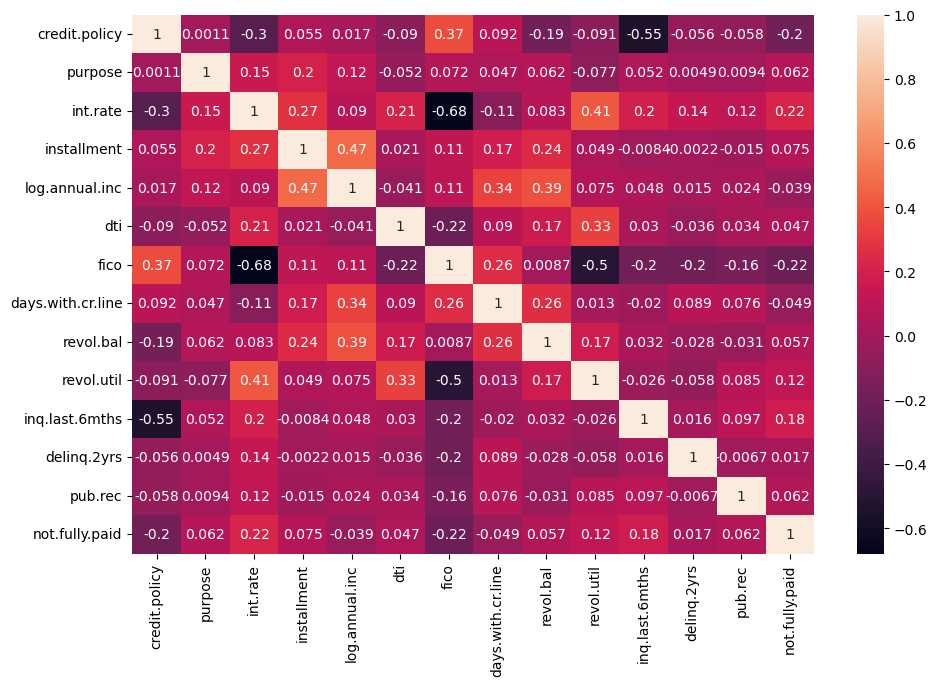

In [31]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)

In [32]:
# see the sorted results
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.222356
fico                 0.215887
credit.policy        0.197173
inq.last.6mths       0.175923
revol.util           0.116037
installment          0.075112
purpose              0.062396
pub.rec              0.062179
revol.bal            0.056760
days.with.cr.line    0.049048
dti                  0.046921
log.annual.inc       0.038936
delinq.2yrs          0.016787
Name: not.fully.paid, dtype: float64

In [33]:
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [34]:
# Taking the column with top correlation
X=new_df[['credit.policy','purpose', 'int.rate', 'installment','fico','revol.bal','revol.util','inq.last.6mths','pub.rec']]

In [35]:
X.shape

(16090, 9)

In [36]:
#Lets put the target variable to y
y=new_df['not.fully.paid']

In [37]:
# Create train set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [38]:
X_train.shape

(12872, 9)

In [39]:
X_test.shape

(3218, 9)

In [40]:
X_train

,credit.policy,purpose,int.rate,installment,fico,revol.bal,revol.util,inq.last.6mths,pub.rec
9218,0,2,0.1426,343.06,687,28282,85.4,5,0
6190,1,2,0.1322,243.37,682,23079,74.9,0,0
6671,1,2,0.1357,271.75,697,6382,74.2,1,0
3983,1,0,0.1221,266.52,717,6883,65.6,0,0
9375,0,2,0.1148,403.87,727,256757,82.7,0,0
...,...,...,...,...,...,...,...,...,...
4574,1,3,0.1322,338.01,692,2263,17.7,0,0
2651,1,6,0.1189,530.63,757,29204,51.9,2,0
2547,1,1,0.1379,272.61,682,9287,61.9,1,0
5910,1,0,0.0774,168.59,747,2534,22.2,2,0


In [41]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [42]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Create a deep learning model using Keras with Tensorflow backend

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
# create the architecture
# 2 ANN layer
model=Sequential()
model.add(Dense(19,activation='relu',input_shape=[9]))
model.add(Dropout(0.20))


model.add(Dense(10,activation='relu'))
model.add(Dropout(0.20))

# output layer
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [46]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
early_stop=EarlyStopping(monitor='val_loss',min_delta=0.001,mode='min',patience=10,verbose=1)

In [48]:
model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/50
51/51 [==============================] - 2s 11ms/step - loss: 0.7052 - accuracy: 0.5597 - val_loss: 0.6643 - val_accuracy: 0.6016
Epoch 2/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.5762 - val_loss: 0.6580 - val_accuracy: 0.6041
Epoch 3/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.5926 - val_loss: 0.6559 - val_accuracy: 0.6081
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6018 - val_loss: 0.6547 - val_accuracy: 0.6053
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.6016 - val_loss: 0.6544 - val_accuracy: 0.6053
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6584 - accuracy: 0.6035 - val_loss: 0.6534 - val_accuracy: 0.6025
Epoch 7/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.6050 - val_loss: 0.6524 - val_accuracy: 0.6041
Epoch 8/50
51/51 [=

In [49]:
history=model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/50
51/51 [==============================] - 0s 5ms/step - loss: 0.6411 - accuracy: 0.6262 - val_loss: 0.6445 - val_accuracy: 0.6249
Epoch 2/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.6288 - val_loss: 0.6445 - val_accuracy: 0.6277
Epoch 3/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6242 - val_loss: 0.6442 - val_accuracy: 0.6271
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.6207 - val_loss: 0.6441 - val_accuracy: 0.6259
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6408 - accuracy: 0.6262 - val_loss: 0.6443 - val_accuracy: 0.6240
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6408 - accuracy: 0.6252 - val_loss: 0.6442 - val_accuracy: 0.6203
Epoch 7/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6235 - val_loss: 0.6442 - val_accuracy: 0.6221
Epoch 8/50
51/51 [==

In [50]:
model.evaluate(X_test,y_test)

101/101 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6246


[0.6428872346878052, 0.6246115565299988]

In [51]:
y_pred=model.predict(X_test)

101/101 [==============================] - 0s 1ms/step


In [52]:
y_pred

array([[0.5871634 ],
       [0.5871743 ],
       [0.60559916],
       ...,
       [0.3994345 ],
       [0.4221612 ],
       [0.5309749 ]], dtype=float32)

In [53]:
predictions=(y_pred>0.5).astype('int')

In [54]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [55]:
y_test

329     0
5316    1
2767    1
2665    1
587     0
       ..
4852    1
7991    1
2253    0
600     1
679     1
Name: not.fully.paid, Length: 3218, dtype: int64

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(predictions,y_test)

0.6246115599751398

In [57]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1659
           1       0.61      0.63      0.62      1559

    accuracy                           0.62      3218
   macro avg       0.62      0.62      0.62      3218
weighted avg       0.63      0.62      0.62      3218



In [58]:
model.save('loan_default1.h5')